## library

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.dates import date2num

## load data

In [4]:
customers = pd.read_csv('./data/olist_customers_dataset.csv')
geolocation = pd.read_csv('./data/olist_geolocation_dataset.csv')
order_items = pd.read_csv('./data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('./data/olist_order_payments_dataset.csv')
reviews = pd.read_csv('./data/olist_order_reviews_dataset.csv')
orders = pd.read_csv('./data/olist_orders_dataset.csv')
products = pd.read_csv('./data/olist_products_dataset.csv')
sellers = pd.read_csv('./data/olist_sellers_dataset.csv')

## merge data

- 추후의 매출액을 예측하는 것이므로 payment_dataset의 dataframe을 기준으로 함.

### 1. olist_orders_dataset의 'order_id'에 맞는'customer_id' 붙이기

In [5]:
merge_df_1 = pd.merge(order_payments, orders[['order_id', 'customer_id', 'order_purchase_timestamp']], on='order_id', how='left')
merge_df_1

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_purchase_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,2018-05-21 13:59:17
...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,2018-03-08 16:57:23
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,2017-08-18 09:45:35
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,2017-11-18 17:27:14
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,2018-08-07 23:26:13


In [6]:
merge_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  103886 non-null  object 
 1   payment_sequential        103886 non-null  int64  
 2   payment_type              103886 non-null  object 
 3   payment_installments      103886 non-null  int64  
 4   payment_value             103886 non-null  float64
 5   customer_id               103886 non-null  object 
 6   order_purchase_timestamp  103886 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.3+ MB


In [7]:
merge_df_1[merge_df_1['customer_id'].isna()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_purchase_timestamp


### 2. customer_dataset에 있는 'customer_state'붙이기

In [8]:
merge_df_2 = pd.merge(merge_df_1, customers[['customer_id', 'customer_state']], on='customer_id', how='left')
merge_df_2

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_purchase_timestamp,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,2018-05-21 13:59:17,SP
...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,2018-03-08 16:57:23,SP
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,2017-08-18 09:45:35,MG
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,2017-11-18 17:27:14,SP
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,2018-08-07 23:26:13,RJ


In [9]:
merge_df_2[merge_df_2['customer_state'].isna()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_purchase_timestamp,customer_state


### 3. order_reviews_dataset의 'review_score' 추가
- null 값 800개 존재
- 어떻게 처리 할 것인지 생각하기 - 데이터 개수가 대략 10만개 정도 되므로 평균으로 대체

In [10]:
merge_df_3 = pd.merge(merge_df_2, reviews[['order_id', 'review_score']], on='order_id', how='left')
merge_df_3

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_purchase_timestamp,customer_state,review_score
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,MG,1.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,SP,5.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,SP,5.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,MG,5.0
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,MG,5.0
...,...,...,...,...,...,...,...,...,...
104472,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,2018-03-08 16:57:23,SP,5.0
104473,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,2017-08-18 09:45:35,MG,5.0
104474,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,2017-11-18 17:27:14,SP,1.0
104475,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,2018-08-07 23:26:13,RJ,5.0


In [11]:
merge_df_3[merge_df_3['review_score'].isna()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_purchase_timestamp,customer_state,review_score
14,cf95215a722f3ebf29e6bbab87a29e61,1,credit_card,5,102.66,e2a8d07201639004b090670ce5efe355,2017-08-25 17:14:15,MG,NaN
338,c776863a93dc0740c6e7d78104b21413,1,credit_card,3,264.08,1710b798ebdc5db6665c815b90a64999,2016-10-10 15:01:27,MA,NaN
431,81c2a9cc7a5d970fa1cb04443002088b,1,boleto,1,73.03,6bba6f64977c6b367a97039f2cc7cc64,2017-11-27 07:36:22,SP,NaN
469,ff5b7f440481674b38554434638beebf,1,boleto,1,110.63,e6ab213cb124524887ac41b8eaca9653,2018-08-15 20:24:56,SP,NaN
486,c2f065051bb7c9e7f88ebc998f332968,1,credit_card,3,37.37,70603180c918c70f8f1455d0ae52a79a,2018-07-31 13:09:16,SP,NaN
...,...,...,...,...,...,...,...,...,...
103643,cda873529ca7ab71f677d5ec11a40304,1,credit_card,2,75.90,76c74aaff2f3f7355f46d9818ad092b8,2016-10-05 16:57:30,RJ,NaN
104015,71c0d1686c9b5556355dc29a0f5cf8dd,1,credit_card,1,98.20,076523f7baf4359c0728c0bee2d8ccc1,2017-11-26 19:11:20,MG,NaN
104395,b87c9466fb7a6b04a632222b07c1922d,1,credit_card,6,125.42,f69987b9f125768a2cf3243679536a80,2017-09-15 11:59:48,RJ,NaN
104397,a722dd5ab3a3cf4065a47d75a502fdab,1,credit_card,6,226.70,9f8713bb5653423221f0c56370f9b12d,2018-04-02 14:56:53,MG,NaN


In [12]:
# NA 값을 평균값으로 대체
mean_review_score = merge_df_3['review_score'].mean()
merge_df_3['review_score'].fillna(mean_review_score, inplace=True)
merge_df_3

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_purchase_timestamp,customer_state,review_score
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,MG,1.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,SP,5.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,SP,5.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,MG,5.0
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,MG,5.0
...,...,...,...,...,...,...,...,...,...
104472,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,2018-03-08 16:57:23,SP,5.0
104473,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,2017-08-18 09:45:35,MG,5.0
104474,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,2017-11-18 17:27:14,SP,1.0
104475,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,2018-08-07 23:26:13,RJ,5.0


In [13]:
merge_df_3[merge_df_3['review_score'].isna()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_purchase_timestamp,customer_state,review_score


In [14]:
merge_df_3.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_id',
       'order_purchase_timestamp', 'customer_state', 'review_score'],
      dtype='object')

In [15]:
# 필요없는 열 지우기
merge_df_3 = merge_df_3.drop(columns=['payment_sequential'])
merge_df_3

,order_id,payment_type,payment_installments,payment_value,customer_id,order_purchase_timestamp,customer_state,review_score
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,MG,1.0
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,SP,5.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,SP,5.0
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,MG,5.0
4,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,MG,5.0
...,...,...,...,...,...,...,...,...
104472,0406037ad97740d563a178ecc7a2075c,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,2018-03-08 16:57:23,SP,5.0
104473,7b905861d7c825891d6347454ea7863f,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,2017-08-18 09:45:35,MG,5.0
104474,32609bbb3dd69b3c066a6860554a77bf,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,2017-11-18 17:27:14,SP,1.0
104475,b8b61059626efa996a60be9bb9320e10,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,2018-08-07 23:26:13,RJ,5.0


In [16]:
# order_purchase_timestamp 열을 datetime 형식으로 변환
merge_df_3['order_purchase_timestamp'] = pd.to_datetime(merge_df_3['order_purchase_timestamp'])

# 날짜와 시간을 분리하여 새로운 열 생성
merge_df_3['purchase_date'] = merge_df_3['order_purchase_timestamp'].dt.date
merge_df_3['purchase_time'] = merge_df_3['order_purchase_timestamp'].dt.time

# 원래의 order_purchase_timestamp 열을 지움
merge_df_3.drop(columns=['order_purchase_timestamp'], inplace=True)

# purchase_date와 purchase_time 열을 datetime 형식으로 변환
merge_df_3['purchase_date'] = pd.to_datetime(merge_df_3['purchase_date'])
merge_df_3['purchase_time'] = pd.to_datetime(merge_df_3['purchase_time'], format='%H:%M:%S').dt.time


In [17]:
merge_df_3

,order_id,payment_type,payment_installments,payment_value,customer_id,customer_state,review_score,purchase_date,purchase_time
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,MG,1.0,2018-04-25,22:01:49
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,SP,5.0,2018-06-26,11:01:38
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,SP,5.0,2017-12-12,11:19:55
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,MG,5.0,2017-12-06,12:04:06
4,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,MG,5.0,2017-12-06,12:04:06
...,...,...,...,...,...,...,...,...,...
104472,0406037ad97740d563a178ecc7a2075c,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,SP,5.0,2018-03-08,16:57:23
104473,7b905861d7c825891d6347454ea7863f,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,MG,5.0,2017-08-18,09:45:35
104474,32609bbb3dd69b3c066a6860554a77bf,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,SP,1.0,2017-11-18,17:27:14
104475,b8b61059626efa996a60be9bb9320e10,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,RJ,5.0,2018-08-07,23:26:13


In [18]:
merge_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104477 entries, 0 to 104476
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_id              104477 non-null  object        
 1   payment_type          104477 non-null  object        
 2   payment_installments  104477 non-null  int64         
 3   payment_value         104477 non-null  float64       
 4   customer_id           104477 non-null  object        
 5   customer_state        104477 non-null  object        
 6   review_score          104477 non-null  float64       
 7   purchase_date         104477 non-null  datetime64[ns]
 8   purchase_time         104477 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 8.0+ MB


In [17]:
# # 저장
# merge_df_3.to_csv('./data/merge_df.csv', encoding = 'utf-8')

---

## eda

In [18]:
merge_df_3

,order_id,payment_type,payment_installments,payment_value,customer_id,customer_state,review_score,purchase_date,purchase_time
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,MG,1.0,2018-04-25,22:01:49
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,SP,5.0,2018-06-26,11:01:38
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,SP,5.0,2017-12-12,11:19:55
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,MG,5.0,2017-12-06,12:04:06
4,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,MG,5.0,2017-12-06,12:04:06
...,...,...,...,...,...,...,...,...,...
104472,0406037ad97740d563a178ecc7a2075c,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,SP,5.0,2018-03-08,16:57:23
104473,7b905861d7c825891d6347454ea7863f,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,MG,5.0,2017-08-18,09:45:35
104474,32609bbb3dd69b3c066a6860554a77bf,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,SP,1.0,2017-11-18,17:27:14
104475,b8b61059626efa996a60be9bb9320e10,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,RJ,5.0,2018-08-07,23:26:13


In [19]:
merge_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104477 entries, 0 to 104476
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_id              104477 non-null  object        
 1   payment_type          104477 non-null  object        
 2   payment_installments  104477 non-null  int64         
 3   payment_value         104477 non-null  float64       
 4   customer_id           104477 non-null  object        
 5   customer_state        104477 non-null  object        
 6   review_score          104477 non-null  float64       
 7   purchase_date         104477 non-null  datetime64[ns]
 8   purchase_time         104477 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 8.0+ MB


### 일별 매출 액
- 2016년 9월부터 데이터 존재(11월 x)
    - 9, 12월은 데이터가 거의 없음
    - 10월만 데이터 존재한다고 봐도 무방함. -> 2016년을 빼면 어떨까?
    <br><br>
- 2018년 9, 10월은 데이터가 제외

In [19]:
payment_by_date  = pd.DataFrame(merge_df_3.groupby('purchase_date')['payment_value'].sum())
payment_by_date

,payment_value
purchase_date,
2016-09-04,136.23
2016-09-05,75.06
2016-09-13,40.95
2016-10-02,109.34
2016-10-03,595.14
...,...
2018-09-29,137.03
2018-10-01,80.38
2018-10-03,197.55


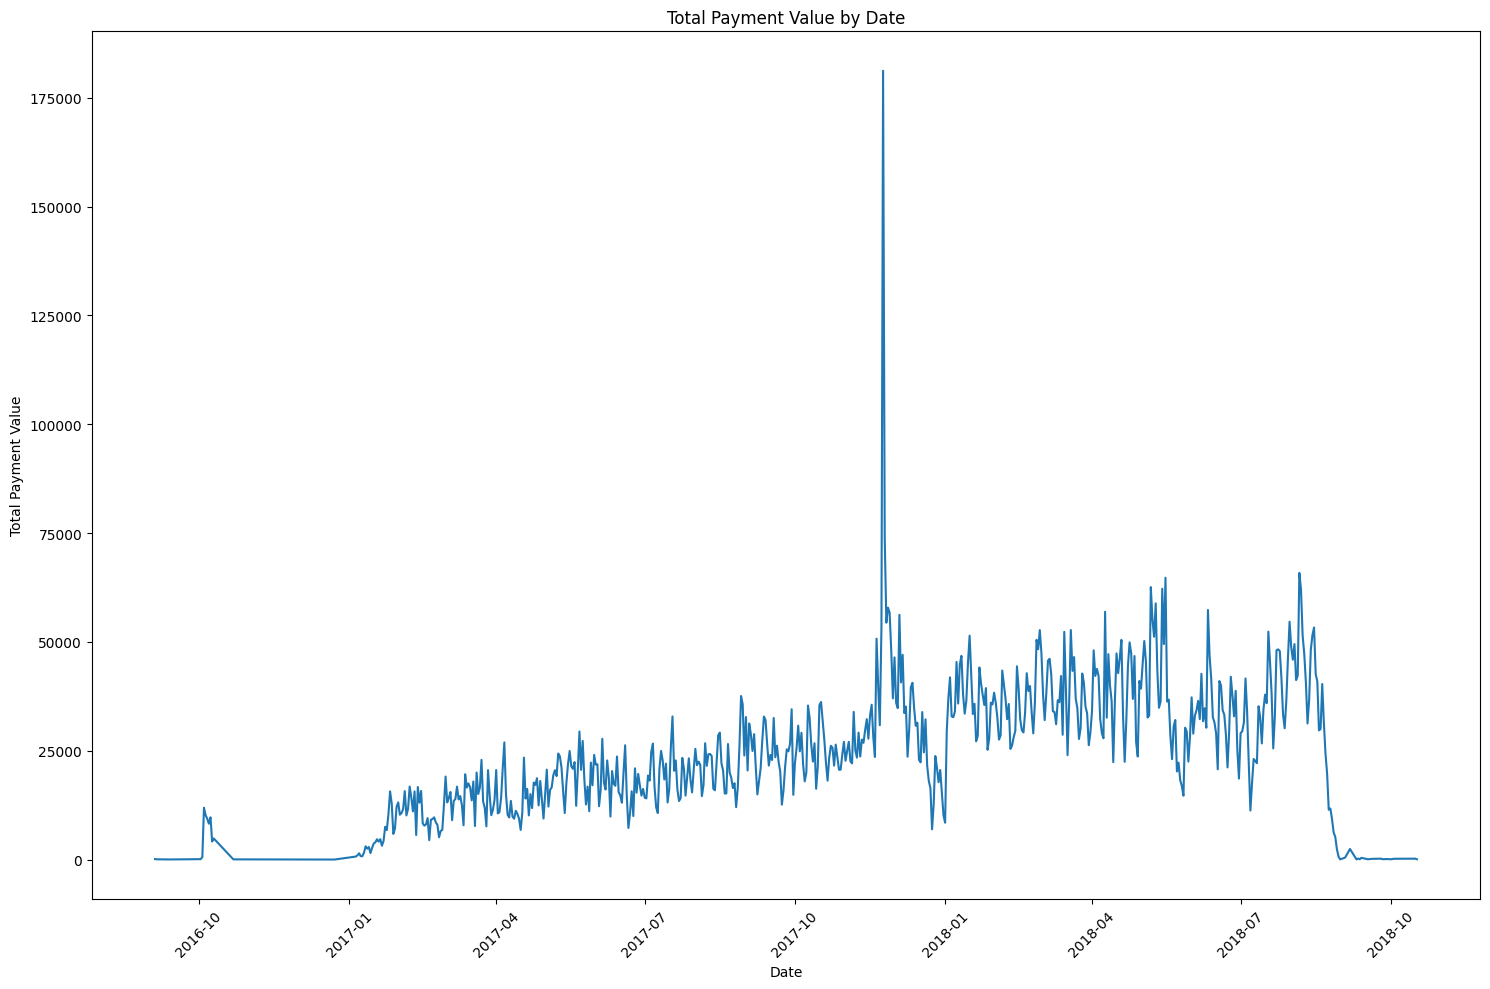

In [20]:
# 일별 매출 액 시각화
plt.figure(figsize=(15, 10))
plt.plot(payment_by_date.index, payment_by_date.values)
plt.title('Total Payment Value by Date')
plt.xlabel('Date')
plt.ylabel('Total Payment Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

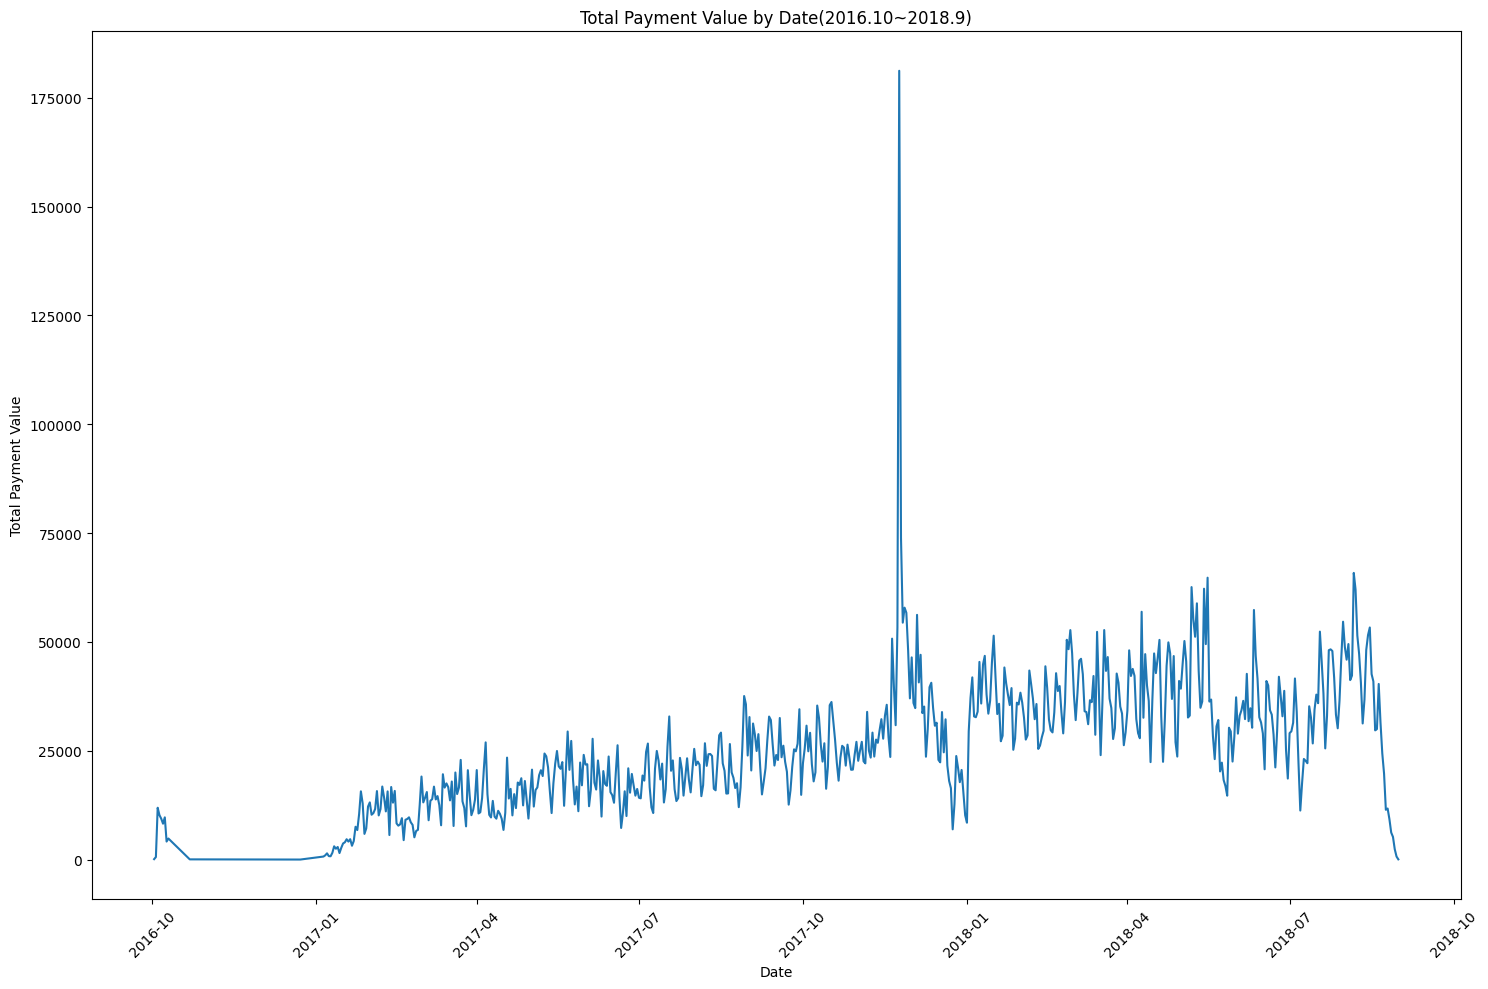

In [21]:
# 2016년 9월/2018년 10월 데이터 제외

# 데이터 추출
start_date = '2016-10-01'
end_date = '2018-09-01'

filtered_data = payment_by_date[start_date:end_date]
filtered_data

# 날짜별로 그룹화한 후 payment_value 합산
payment_by_date_filter = filtered_data.groupby('purchase_date')['payment_value'].sum()

# 시각화
plt.figure(figsize=(15, 10))
plt.plot(payment_by_date_filter.index, payment_by_date_filter.values)
plt.title('Total Payment Value by Date(2016.10~2018.9)')
plt.xlabel('Date')
plt.ylabel('Total Payment Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
a

,payment_value
purchase_date,
2017-01-05,707.27
2017-01-06,988.28
2017-01-07,1447.99
2017-01-08,809.63
2017-01-09,774.51
...,...
2018-08-25,11737.76
2018-08-26,9304.00
2018-08-27,6229.95


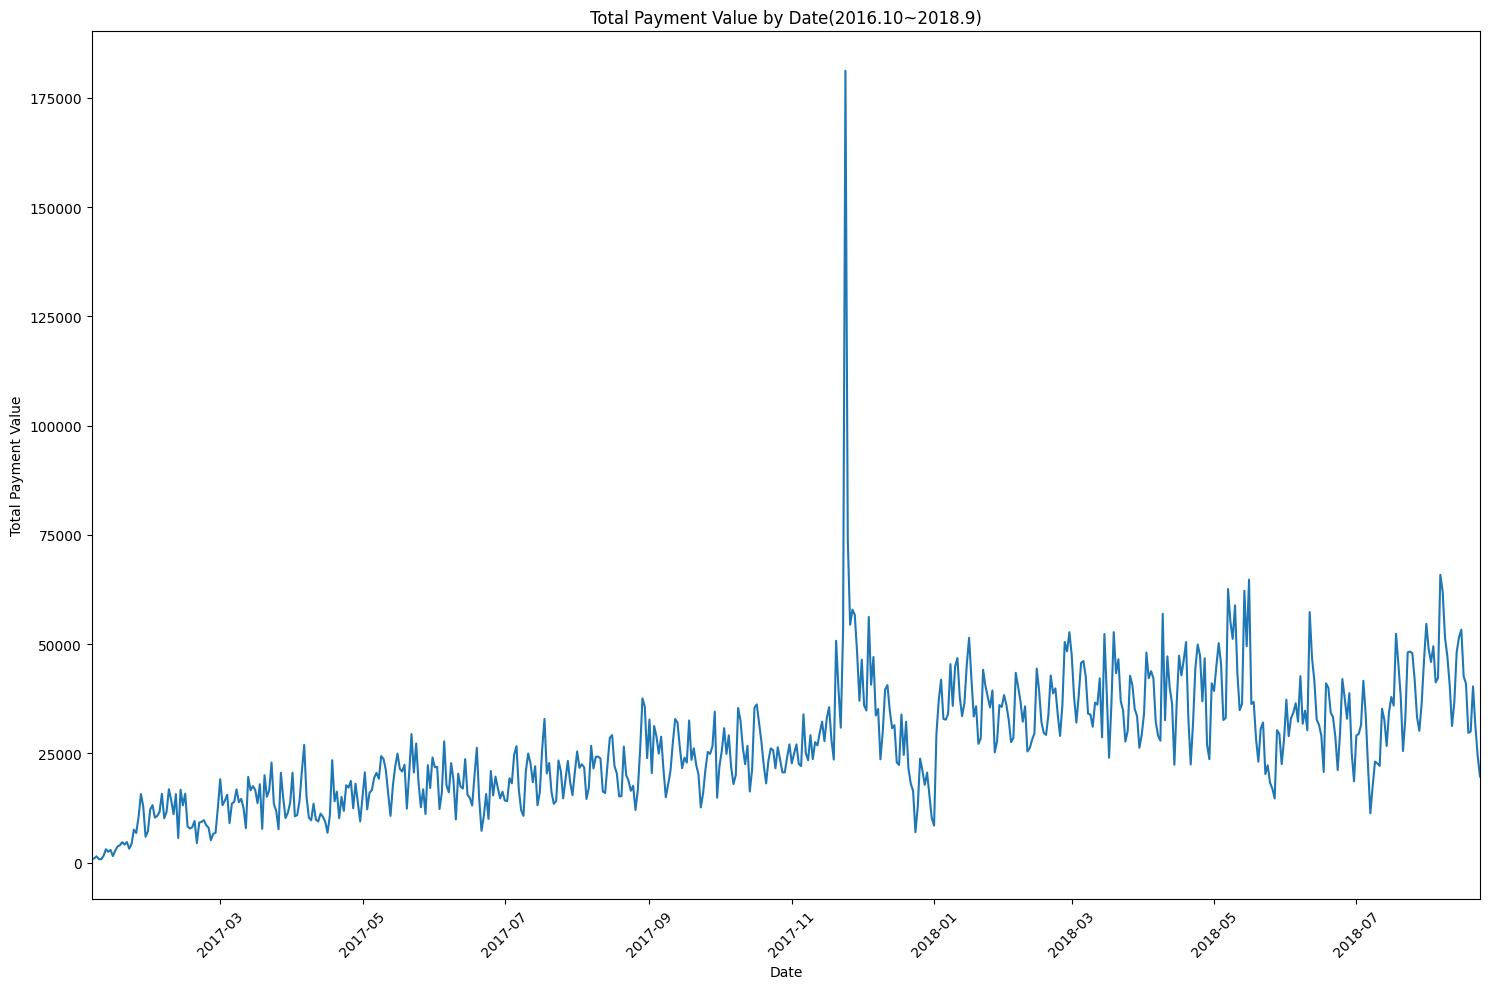

In [58]:
# 2016년 제외/2018년 9, 10월 데이터 제외

# 데이터 추출
start_date = '2017-01-05'
end_date = '2018-08-23'

filtered_data = payment_by_date[start_date:end_date]
filtered_data

# 날짜별로 그룹화한 후 payment_value 합산
a = pd.DataFrame(filtered_data.groupby('purchase_date')['payment_value'].sum())

# 시각화
plt.figure(figsize=(15, 10))
plt.plot(a.index, a.values)
plt.title('Total Payment Value by Date(2016.10~2018.9)')
plt.xlabel('Date')
plt.ylabel('Total Payment Value')
plt.xticks(rotation=45)

# x축 범위 지정
start_date = datetime.strptime('2017-01-05', '%Y-%m-%d')
end_date = datetime.strptime('2018-08-23', '%Y-%m-%d')
plt.xlim(date2num(start_date), date2num(end_date))

plt.tight_layout()
plt.show()


In [69]:
# 2017년부터 2018년까지의 데이터 추출
start_date = '2017-01-01'
end_date = '2018-08-31'
ex = payment_by_date_filter[start_date:end_date]

# 월별 평균 결제 금액 계산
monthly_average = pd.DataFrame(ex.resample('M')['payment_value'].sum())
monthly_average

,payment_value
purchase_date,
2017-01-31,139459.77
2017-02-28,293325.95
2017-03-31,451859.95
2017-04-30,418753.06
2017-05-31,597244.78
2017-06-30,515436.59
2017-07-31,596377.93
2017-08-31,680105.55
2017-09-30,730663.50


In [64]:
monthly_average.index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31'],
              dtype='datetime64[ns]', name='purchase_date', freq='M')

In [65]:
monthly_average.index = monthly_average.index.strftime('%Y-%m')
monthly_average

,payment_value
purchase_date,
2017-01,139459.77
2017-02,293325.95
2017-03,451859.95
2017-04,418753.06
2017-05,597244.78
2017-06,515436.59
2017-07,596377.93
2017-08,680105.55
2017-09,730663.50


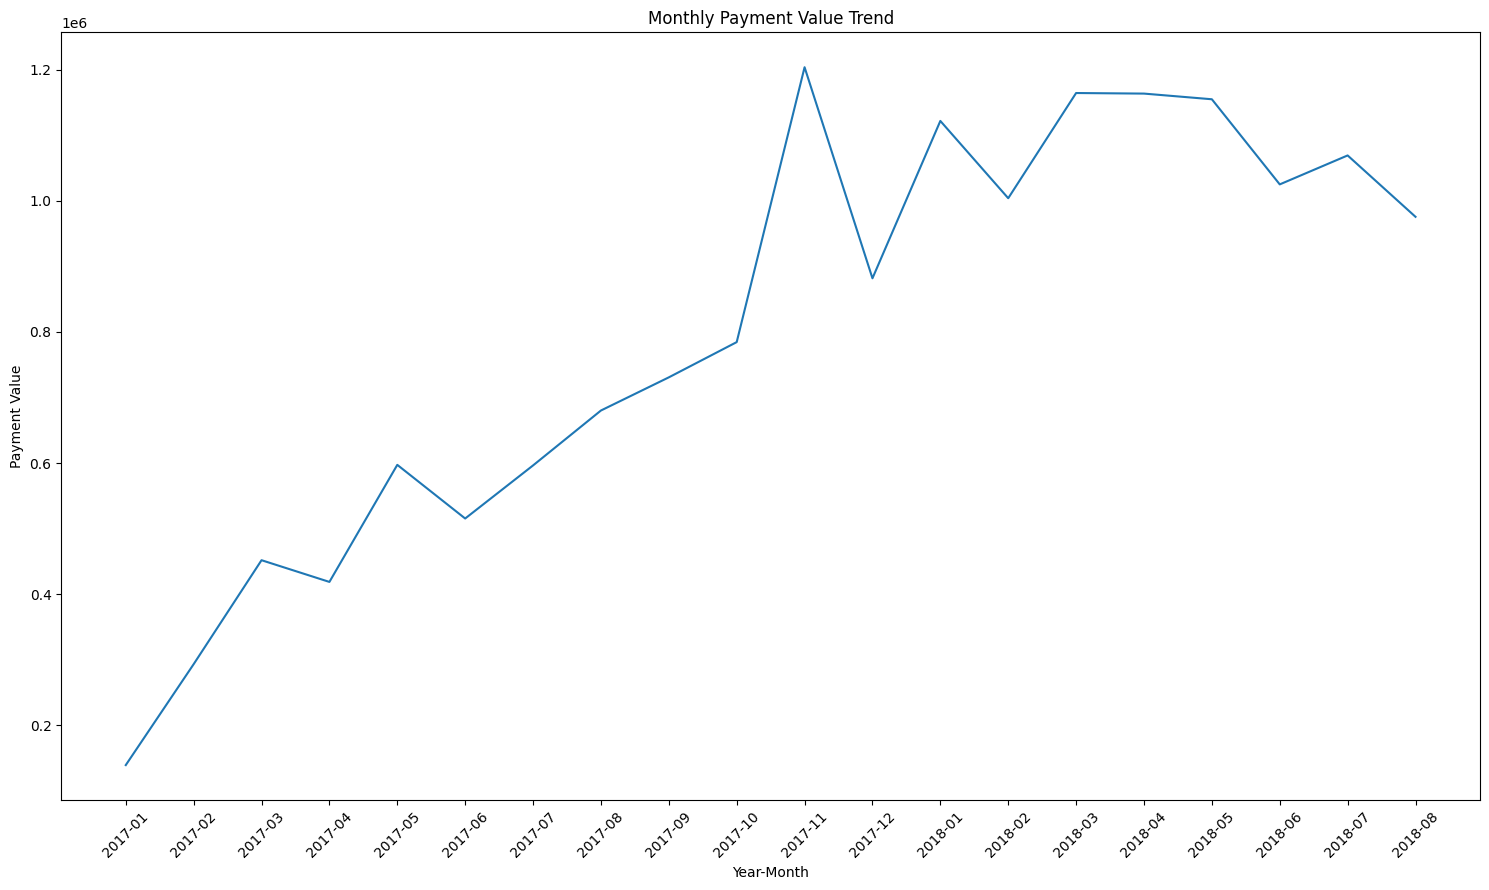

In [66]:
plt.figure(figsize=(15, 9))

# 시각화
sns.lineplot(data=monthly_average, x=monthly_average.index, y="payment_value")

# x축 레이블 및 제목 설정
plt.xlabel("Year-Month")
plt.ylabel("Payment Value")
plt.title("Monthly Payment Value Trend")

# x축 레이블 회전
plt.xticks(rotation=45)

# 그래프 표시
plt.tight_layout()
plt.show()

---

## SARIMA

In [29]:
# !pip install statsmodels

Active code page: 65001


In [30]:
# library
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import numpy as np
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm

import warnings  
warnings.filterwarnings('ignore')


### payment_by_date_filter(일별 데이터)
- 단위근 검정에서는 안정적이라고 판단
- but, 계절성 존재
- 따라서, 안정성을 가지고 있지 않다고 판단.

In [73]:
payment_by_date_filter = payment_by_date_filter[:596]
payment_by_date_filter

,payment_value
purchase_date,
2017-01-05,707.27
2017-01-06,988.28
2017-01-07,1447.99
2017-01-08,809.63
2017-01-09,774.51
...,...
2018-08-19,29989.35
2018-08-20,40352.47
2018-08-21,31479.90


In [74]:
# Augmented Dickey-Fuller 단위근 검정 수행
result = adfuller(payment_by_date_filter['payment_value'])

# 검정 결과 출력
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])


### ADF 값이 Critical Values보다 작지 않고(오히려 크다), p-value가 0.05보다 작으므로 안정적이라고 판단.

ADF Statistic: -3.1836436275493627
p-value: 0.02095118714844508
Critical Values: {'1%': -3.4416749612171467, '5%': -2.8665360672844318, '10%': -2.5694307639714626}


<Figure size 640x480 with 0 Axes>

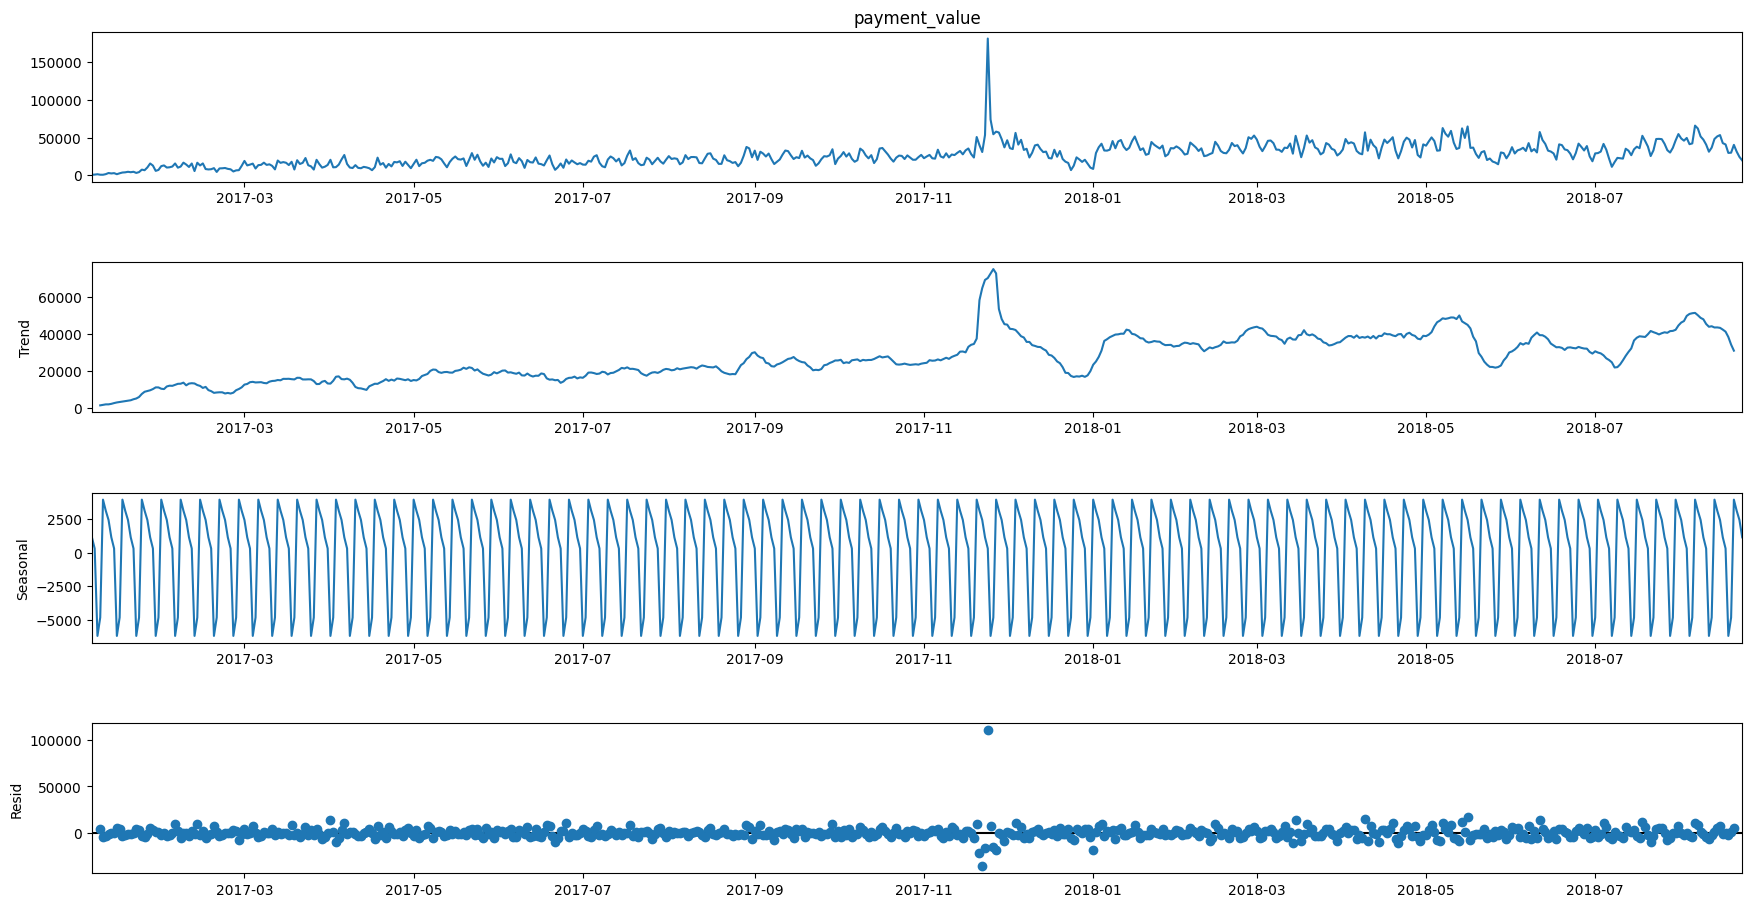

In [75]:
# 7일 별로 봤을 때 
result = seasonal_decompose(payment_by_date_filter["payment_value"], model="additive", period=7)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,10)
plt.show()


### 추세는 판단하기 애매 / 계절성은 있는 것으로 판단.

<Figure size 640x480 with 0 Axes>

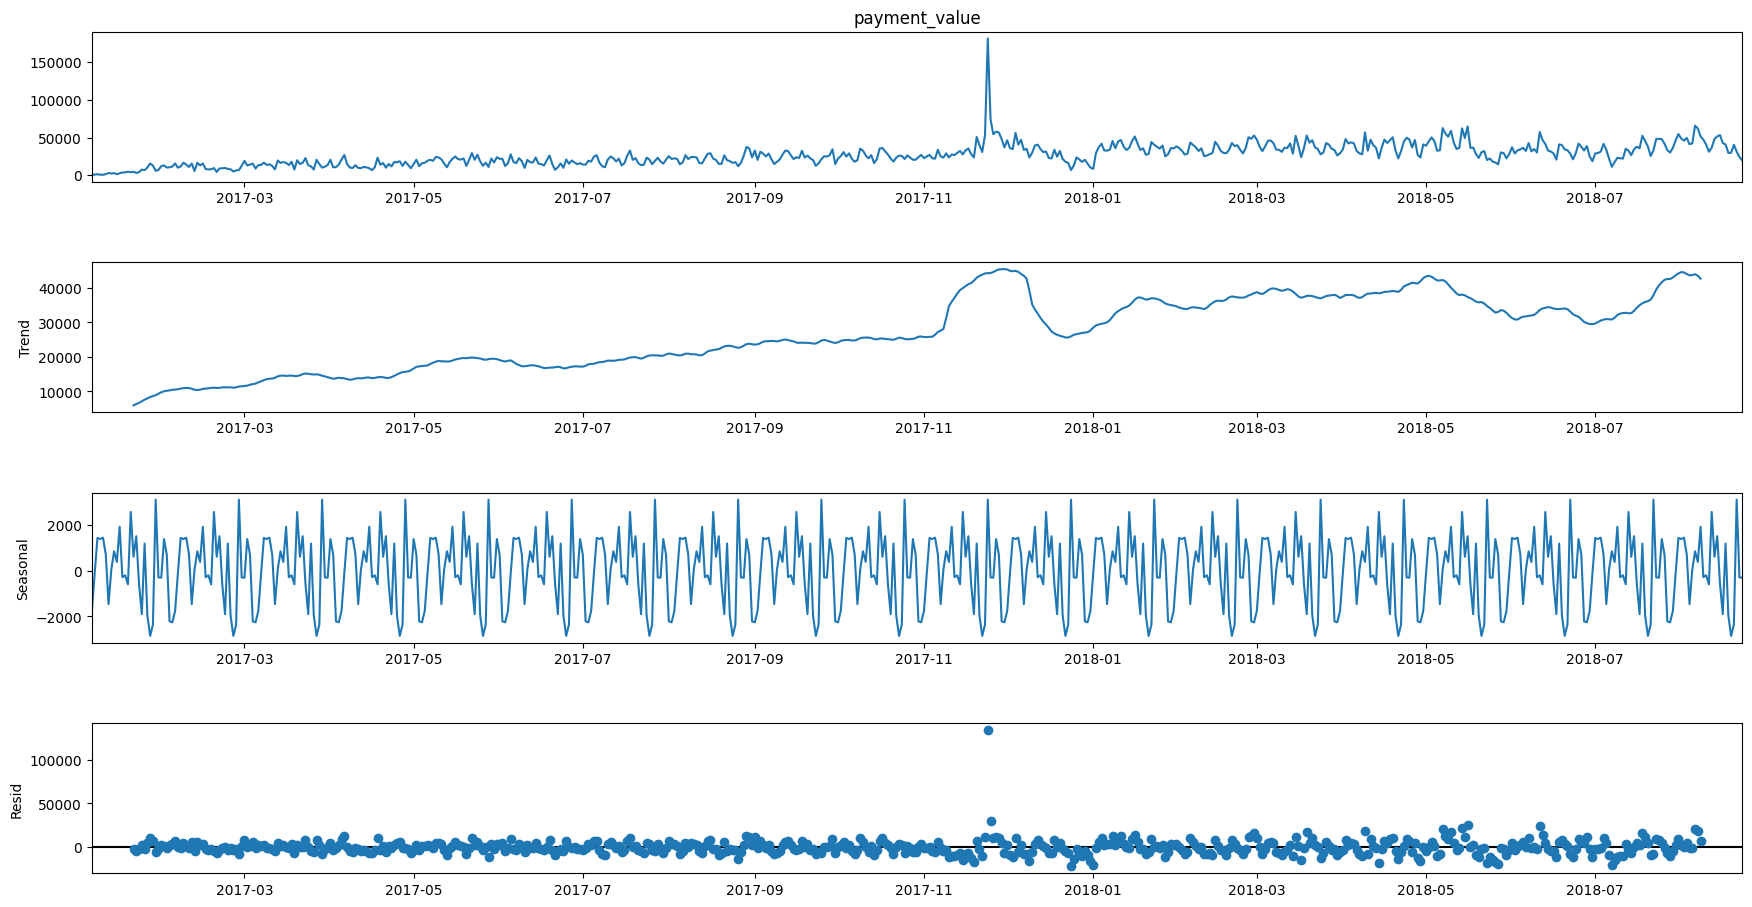

In [76]:
# 30일 별로 봤을 때 
result = seasonal_decompose(payment_by_date_filter["payment_value"], model="additive", period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,10)
plt.show()


### 추세는 계속 증가하는 추세 / 계절성은 있는 것으로 판단.

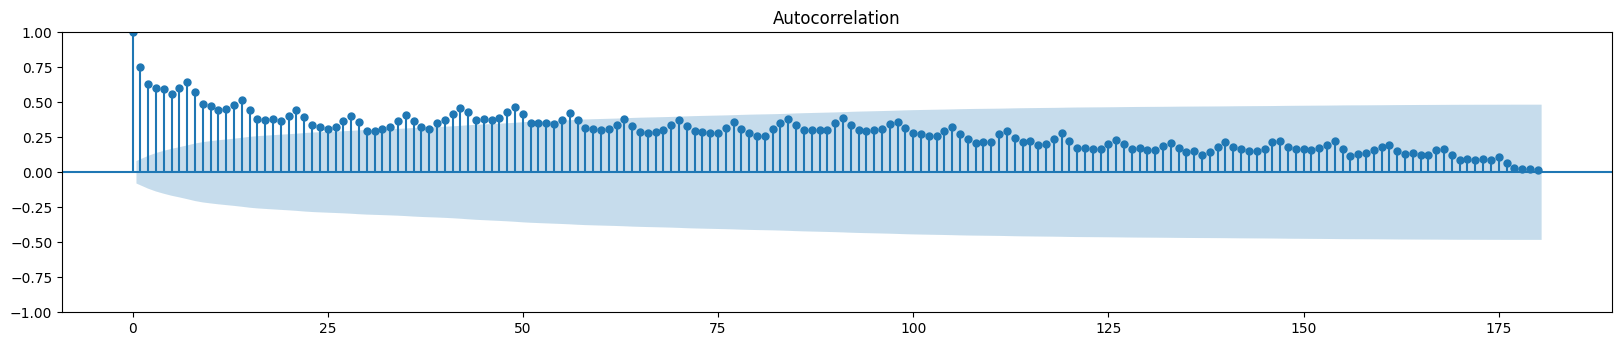

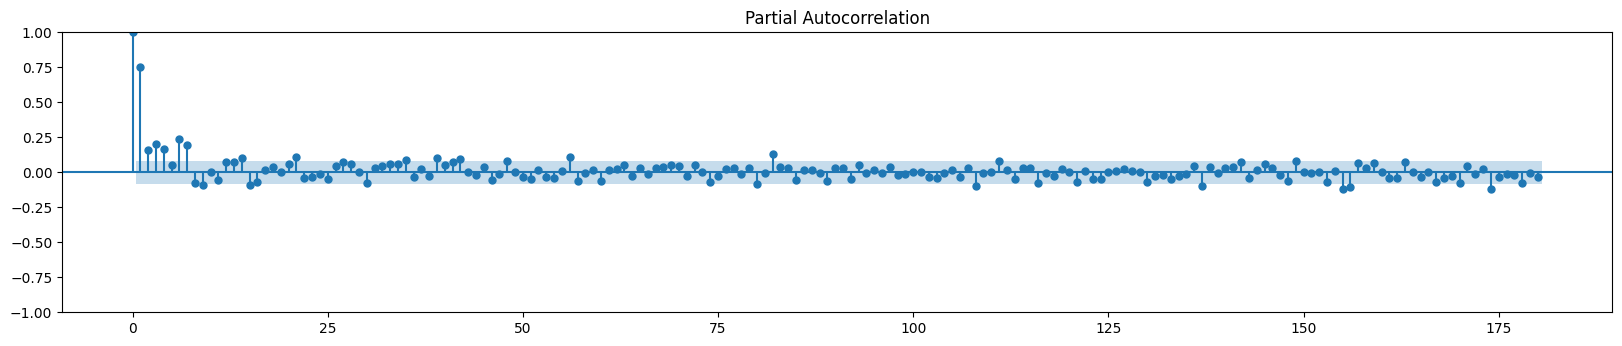

In [77]:
# ACF, PACF
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(payment_by_date_filter["payment_value"], lags=180, ax=ax1)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(payment_by_date_filter["payment_value"], lags=180, ax=ax1)

In [35]:
## 전체 평 : 안정성을 가지고 있지 않다고 판단.

In [78]:
payment_by_date_filter.columns

Index(['payment_value'], dtype='object')

In [80]:
# 데이터 
time_series = payment_by_date_filter.index
target_variable = payment_by_date_filter['payment_value']

In [51]:
# 계절성 주기
s = 30

# 파라미터 범위 설정
p_values = range(1,3)
d_values = range(1,3)
q_values = range(22, 24)
P_values = range(2,5)
D_values = [1]
Q_values = range(2,5)

# 최적 모델 초기화
best_aic = float("inf")
best_params = None

# 모든 파라미터 조합 시도
for p, d, q, P, D, Q in tqdm(product(p_values, d_values, q_values, P_values, D_values, Q_values)):
    try:
        model = SARIMAX(target_variable, order=(p, d, q), seasonal_order=(P, D, Q, s))
        result = model.fit(disp=False)
        if result.aic < best_aic:
            best_aic = result.aic
            best_params = (p, d, q, P, D, Q)
    except:
        continue

print(f"Best AIC: {best_aic}")
print(f"Best Parameters: {best_params}")

72it [7:31:48, 376.51s/it]

Best AIC: 12335.85703373444
Best Parameters: (2, 1, 22, 2, 1, 2)


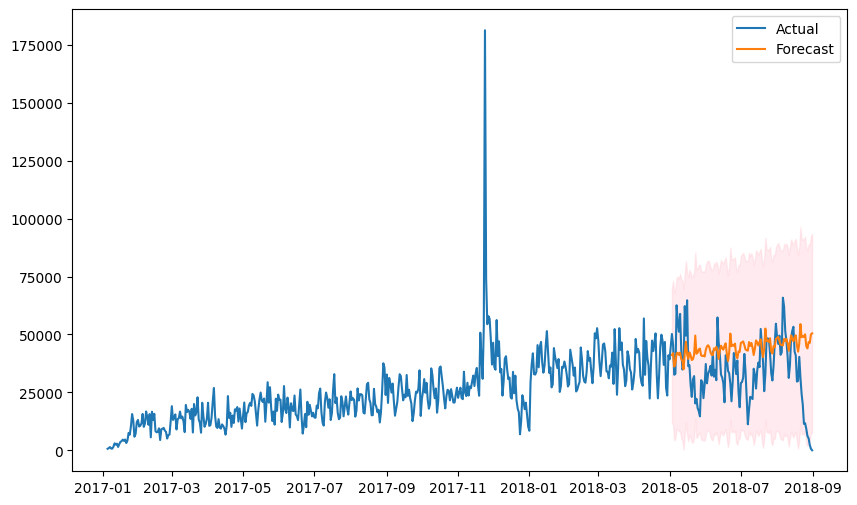

In [52]:
# 데이터 나누기 (데이터 앞쪽 80%를 학습, 나머지 20%를 테스트 데이터로 사용)
train_size = int(0.8 * len(target_variable))
train_data = target_variable[:train_size]
test_data = target_variable[train_size:]

# 최적의 파라미터로 SARIMA 모델 학습
best_model = SARIMAX(train_data, order=(best_params[0], best_params[1], best_params[2]),
                     seasonal_order=(best_params[3], best_params[4], best_params[5], s))
best_result = best_model.fit()

# 테스트 데이터 예측
forecast_steps = len(test_data)  # 테스트 데이터 길이와 동일하게 예측
forecast = best_result.get_forecast(steps=forecast_steps)

# 예측 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(time_series, target_variable, label='Actual')
plt.plot(test_data.index, forecast.predicted_mean, label='Forecast')
plt.fill_between(test_data.index, forecast.conf_int()["lower payment_value"], forecast.conf_int()["upper payment_value"], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [54]:
best_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                         
================================================================================================
Dep. Variable:                            payment_value   No. Observations:                  483
Model:             SARIMAX(2, 1, 22)x(2, 1, [1, 2], 30)   Log Likelihood               -4847.270
Date:                                  Fri, 01 Sep 2023   AIC                           9752.540
Time:                                          06:09:36   BIC                           9871.837
Sample:                                      01-05-2017   HQIC                          9799.551
                                           - 05-02-2018                                         
Covariance Type:                                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0544      1.497      0.036      0.971      -2.881       2.989
ar.L2         -0.0853      1.400     -0.061      0.951      -2.829       2.658
ma.L1         -0.6134      1.502     -0.408      0.683      -3.557       2.330
ma.L2         -0.1106      1.365     -0.081      0.935      -2.786       2.565
ma.L3         -0.1126      0.929     -0.121      0.903      -1.933       1.708
ma.L4          0.0565      0.411      0.137      0.891      -0.749       0.862
ma.L5         -0.1024      0.196     -0.523      0.601      -0.486       0.281
ma.L6          0.0222      0.187      0.119      0.906      -0.344       0.388
ma.L7          0.1454      0.169      0.862      0.389      -0.185       0.476
ma.L8         -0.0827      0.268     -0.309      0.757      -0.607       0.442
ma.L9         -0.1128      0.274     -0.412      0.680      -0.649       0.424
ma.L10         0.0336      0.284      0.118      0.906      -0.524       0.591
ma.L11        -0.0874      0.299     -0.292      0.770      -0.674       0.499
ma.L12         0.0691      0.291      0.238      0.812      -0.500       0.639
ma.L13         0.0082      0.210      0.039      0.969      -0.403       0.419
ma.L14         0.0910      0.165      0.552      0.581      -0.232       0.414
ma.L15        -0.0885      0.244     -0.363      0.717      -0.566       0.389
ma.L16        -0.0870      0.217     -0.401      0.688      -0.512       0.338
ma.L17         0.0234      0.311      0.075      0.940      -0.587       0.634
ma.L18         0.0622      0.254      0.245      0.806      -0.435       0.559
ma.L19        -0.0595      0.266     -0.223      0.823      -0.582       0.463
ma.L20         0.0245      0.255      0.096      0.923      -0.476       0.525
ma.L21         0.0867      0.203      0.427      0.670      -0.311       0.485
ma.L22        -0.1175      0.190     -0.617      0.537      -0.491       0.256
ar.S.L30      -0.6000      2.373     -0.253      0.800      -5.251       4.051
ar.S.L60      -0.1066      0.342     -0.311      0.756      -0.778       0.565
ma.S.L30      -0.3487      2.373     -0.147      0.883      -5.000       4.302
ma.S.L60      -0.3296      1.908     -0.173      0.863      -4.069       3.410
sigma2      2.126e+08   4.59e-08   4.63e+15      0.000    2.13e+08    2.13e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            241044.32
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               3.22   Skew:                             7.52
Prob(H) (two-sided):                  0.00   Kurtosis:                       115.13
===================================================================================

Warnings:
[1] Covariance matrix calculated usi

In [61]:
len(actual_values[483:])

121

In [58]:
len(predicted_values)

121

In [62]:
# 평가 지표 계산
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import linregress

actual_values = target_variable.values
actual_values_1 = actual_values[483:]
predicted_values = forecast.predicted_mean.values

mae = mean_absolute_error(actual_values_1, predicted_values)
mse = mean_squared_error(actual_values_1, predicted_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values_1 - predicted_values) / actual_values_1)) * 100

# AIC 값
aic = best_result.aic

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"AIC: {aic:.2f}")

MAE: 13435.91
MSE: 299997701.65
RMSE: 17320.44
MAPE: 784.45%
AIC: 9752.54


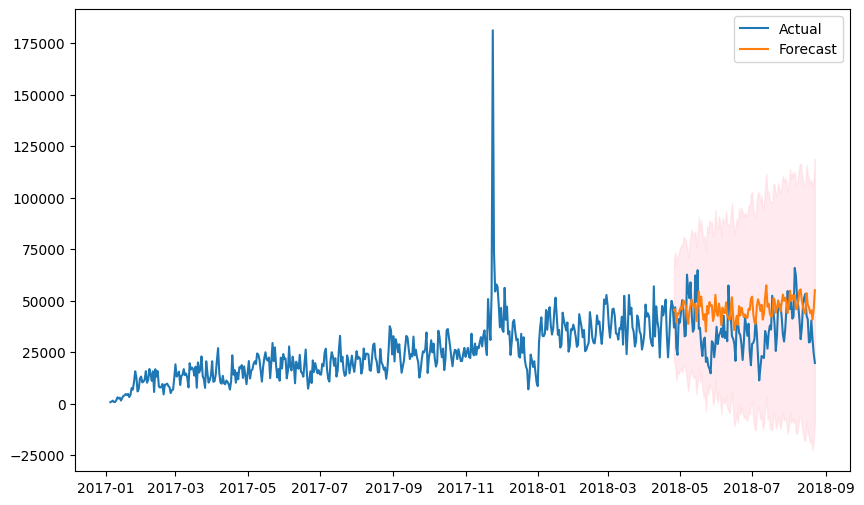

In [83]:
# 데이터 나누기 (데이터 앞쪽 80%를 학습, 나머지 20%를 테스트 데이터로 사용)
train_size = int(0.8 * len(target_variable))
train_data = target_variable[:train_size]
test_data = target_variable[train_size:]

# 최적의 파라미터로 SARIMA 모델 학습
best_model = SARIMAX(train_data, order=(2, 1, 3),
                     seasonal_order=(2, 1, 2, 180))
best_result = best_model.fit()

# 테스트 데이터 예측
forecast_steps = len(test_data)  # 테스트 데이터 길이와 동일하게 예측
forecast = best_result.get_forecast(steps=forecast_steps)

# 예측 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(time_series, target_variable, label='Actual')
plt.plot(test_data.index, forecast.predicted_mean, label='Forecast')
plt.fill_between(test_data.index, forecast.conf_int()["lower payment_value"], forecast.conf_int()["upper payment_value"], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [92]:
# 평가 지표 계산
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import linregress

actual_values = target_variable.values
actual_values_1 = actual_values[476:]
predicted_values = forecast.predicted_mean.values

mae = mean_absolute_error(actual_values_1, predicted_values)
mse = mean_squared_error(actual_values_1, predicted_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values_1 - predicted_values) / actual_values_1)) * 100

# AIC 값
aic = best_result.aic

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"AIC: {aic:.2f}")

MAE: 12990.10
MSE: 235317915.50
RMSE: 15340.08
MAPE: 46.52%
AIC: 6361.93


### monthly_average(월별 데이터)

In [ ]:
# Augmented Dickey-Fuller 단위근 검정 수행
result = adfuller(monthly_average['payment_value'])

# 검정 결과 출력
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])


### ADF 값이 Critical Values보다 작지 않고(오히려 크다), p-value가 0.05보다 크므로 귀무가설 기각불가
### 즉, 안정적이지 않다고 판단. -> 데이터가 정상성을 가지지 않은 상태인 것으로 판단.

ADF Statistic: -2.291575419537779
p-value: 0.17469946424023464
Critical Values: {'1%': -3.859073285322359, '5%': -3.0420456927297668, '10%': -2.6609064197530863}


<Figure size 640x480 with 0 Axes>

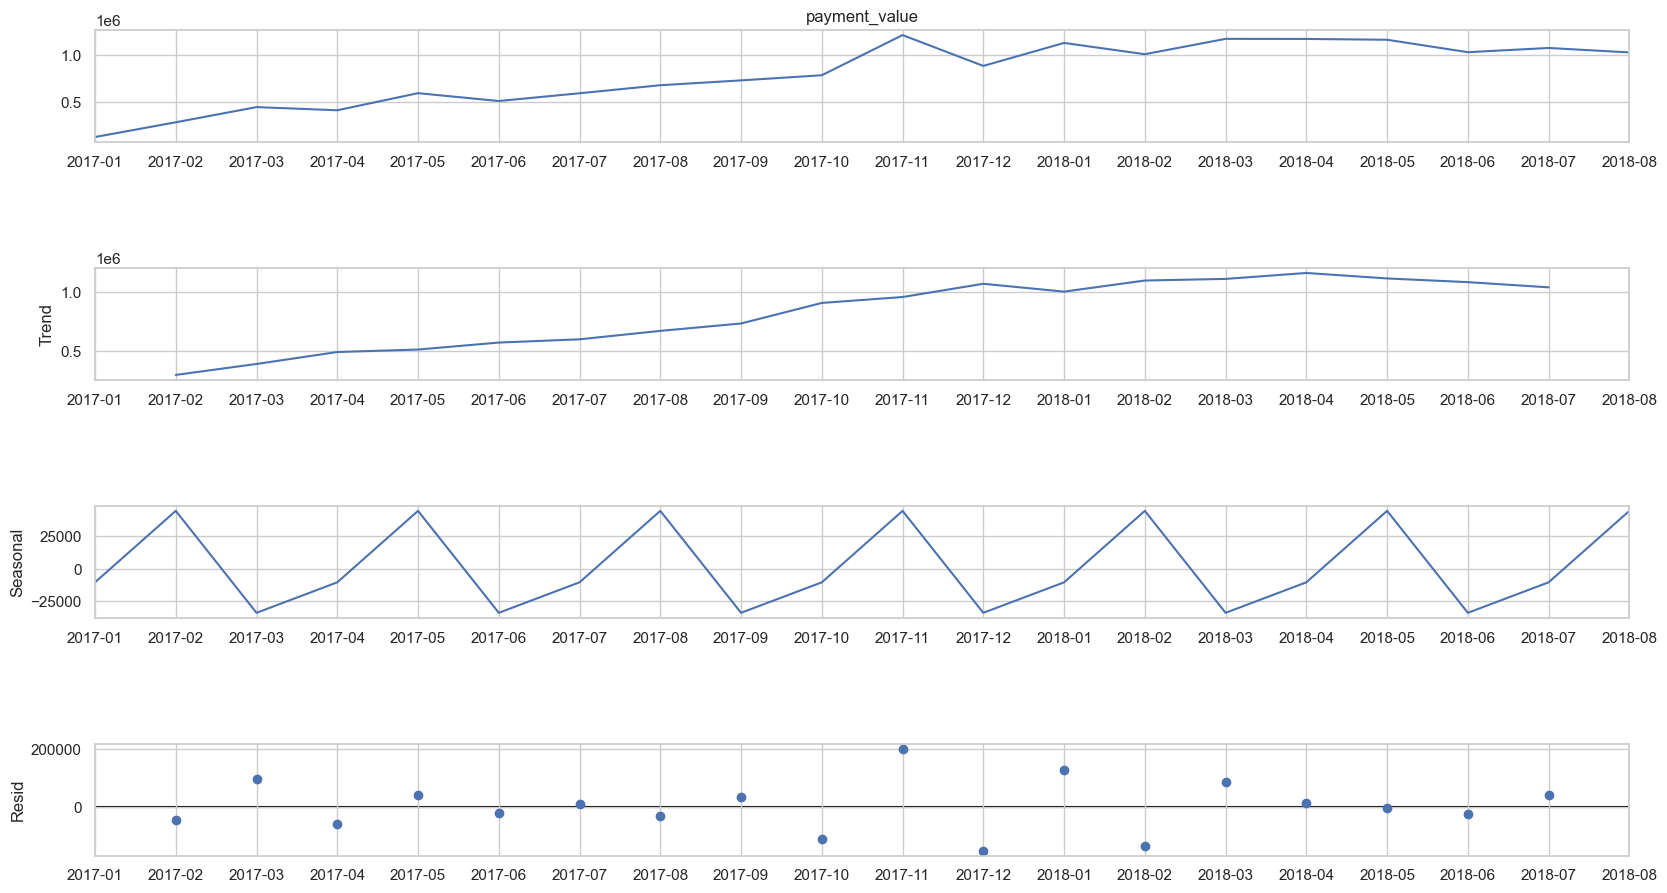

In [ ]:
result = seasonal_decompose(monthly_average["payment_value"], model="additive", period=3)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,10)
plt.show()


### 추세는 계속 증가하는 추세 / 계절성은 있는 것으로 판단.

In [ ]:
# 차분 적용
monthly_average_diff = monthly_average.diff().dropna()
monthly_average_diff

,payment_value
purchase_date,
2017-02,153866.18
2017-03,158534.00
2017-04,-33106.89
2017-05,178491.72
2017-06,-81808.19
2017-07,80941.34
2017-08,83727.62
2017-09,50557.95
2017-10,53725.43


In [ ]:
# ACF와 PACF 분석
plot_acf(monthly_average_diff, lags=20)
plot_pacf(monthly_average_diff, lags=20)
plt.show()

---

In [ ]:
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
monthly_average

,payment_value
purchase_date,
2017-01-31,139459.77
2017-02-28,293325.95
2017-03-31,451859.95
2017-04-30,418753.06
2017-05-31,597244.78
2017-06-30,515436.59
2017-07-31,596377.93
2017-08-31,680105.55
2017-09-30,730663.50


In [ ]:
payment_by_date_filter

,payment_value
purchase_date,
2017-01-05,707.27
2017-01-06,988.28
2017-01-07,1447.99
2017-01-08,809.63
2017-01-09,774.51
...,...
2018-08-27,6229.95
2018-08-28,5216.72
2018-08-29,2381.83
